This notebook solves the 1D convection equation with a finite volume method.  The equation is:

$$\partial_t U + u \partial_x U = 0$$

So $u$ is the convection speed, this code uses $u = 1$.

First, import:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
%matplotlib inline


How many spatial grid points, separated by what value, on what interval?

In [3]:
Nx = 50
x = np.linspace(0, 1, Nx+1)
dx = 1. / Nx


We need the *mid points* of each little "finite volume" (interval in 1D):

In [4]:
xmid = 0.5 * (x[0:Nx] + x[1:Nx+1])

And we need a few more simulation parameters, namely $u$ the wave speed and some final value of $t$ at which to stop:

In [5]:
u = 1
tfinal = 1

To satisfy the CFL condition, need to calculate a $dt$:

In [6]:
CFL = 0.5
dt = CFL * dx / np.abs(u)
print(dt)

0.01


Set up an initial condition - it should *technically* be averaged over each cell, but not end of world to use the midpoint value!  Also, set up the storage of the solution:

In [7]:
U = 0.75 * np.exp(-((xmid - 0.5)/0.1)**2)
solution = []

Now solve!  Loop through, first making a new array that has the solution array with an extra cell on each end - that way we can enforce the periodic boundary condition.  Then calculate the *flux* 

In [8]:
t = 0
while t < tfinal:
    Ubc = np.concatenate((np.array([U[-1]]), U, np.array([U[0]])))
    F = 0.5 * u * (Ubc[1:] + Ubc[0:-1]) - 0.5 * np.abs(u) * \
    (Ubc[1:] - Ubc[0:-1])
    R = F[1:]-F[:-1]
    U = U - (dt/dx)*R
    t += dt
    solution.append(U)

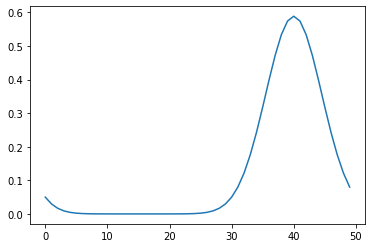

In [9]:
plt.plot(solution[30])
plt.show()